In [2]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

student = pd.read_csv("student-mat.csv", sep=";")
# df['school'] = 
# df['sex'] = df['sex'].replace(['F'], 1)
# df['sex'] = df['sex'].replace(['M'], 0)
student.head()




,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df = student

In [4]:
#df = df[["G1", "G2", "G3", "studytime", "failures", "absences"]]
df = df[["school","sex", "age", "address","famsize", "Pstatus", "Medu", "Fedu", "traveltime","studytime", "failures", "schoolsup", "famsup", "paid", "activities","nursery","higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3"]]
print(df.head())

binaryAttr = ["school", "sex", "address", "famsize","Pstatus","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
binaryAttrVals = [['GP','MS'],['F','M'],['U','R'],['LE3','GT3'],['T','A'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],]

#initialize everything to (0/1)
for i in range(len(binaryAttr)):
    df[binaryAttr[i]] = df[binaryAttr[i]].replace([binaryAttrVals[i][0]], 0)
    df[binaryAttr[i]] = df[binaryAttr[i]].replace([binaryAttrVals[i][1]], 1)
print(df.head())

predict = "G3"

X = np.array(df.drop([predict], 1)) # Features
y = np.array(df[predict]) # Labels
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

  school sex  age address famsize Pstatus  Medu  Fedu  traveltime  studytime  \
0     GP   F   18       U     GT3       A     4     4           2          2   
1     GP   F   17       U     GT3       T     1     1           1          2   
2     GP   F   15       U     LE3       T     1     1           1          2   
3     GP   F   15       U     GT3       T     4     2           1          3   
4     GP   F   16       U     GT3       T     3     3           1          2   

   ...  famrel freetime goout Dalc Walc health absences  G1  G2  G3  
0  ...       4        3     4    1    1      3        6   5   6   6  
1  ...       5        3     3    1    1      3        4   5   5   6  
2  ...       4        3     2    2    3      3       10   7   8  10  
3  ...       3        2     2    1    1      5        2  15  14  15  
4  ...       4        3     2    1    2      5        4   6  10  10  

[5 rows x 29 columns]
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0 

/Users/Kirixiled/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/Kirixiled/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [5]:
best = 0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Acurracy:", acc)

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print('Best: \n', best)
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print('Coefficients: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

Acurracy: 0.769975132806936
Acurracy: 0.6881613560886368
Acurracy: 0.8783025270342807
Acurracy: 0.7617784326267251
Acurracy: 0.8398186241830845
Acurracy: 0.7931635374963342
Acurracy: 0.7986930235882863
Acurracy: 0.7738515362060157
Acurracy: 0.8663097939588001
Acurracy: 0.7055113403963351
Acurracy: 0.7788498443942715
Acurracy: 0.8019253152396854
Acurracy: 0.8307521287645442
Acurracy: 0.8026905099259142
Acurracy: 0.8702860279446888
Acurracy: 0.8064291251623527
Acurracy: 0.917795870844797
Acurracy: 0.7766616992134632
Acurracy: 0.7623626631979616
Acurracy: 0.8588957348398493
Acurracy: 0.7357226838249981
Acurracy: 0.7706132857087672
Acurracy: 0.8043594261802363
Acurracy: 0.8324261959156521
Acurracy: 0.7143599702217729
Acurracy: 0.8135652264159918
Acurracy: 0.7752808547993568
Acurracy: 0.8835414140439569
Acurracy: 0.9238488177965132
Acurracy: 0.802549578605604
Acurracy: 0.9003344478964554
Acurracy: 0.8208702142832018
Acurracy: 0.7861972115062582
Acurracy: 0.9188740381194833
Acurracy: 0.87039

No handles with labels found to put in legend.


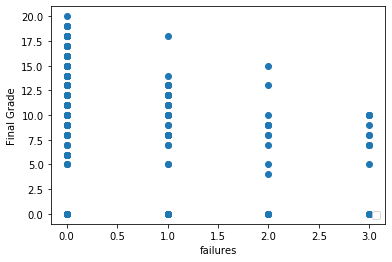

In [6]:
plot = "failures" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(df[plot], df["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()